In [89]:
# pour les imports
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import scipy.stats as ss

In [62]:
n=7
m=11
points_1_10=[1,2, 3, 4, 5, 6, 7, 8, 9, 10] # without 1
maxPoints=10000

# Zayed

In [63]:
class Cards:
    def __init__(self):
        self.ncards = (m-n+1)*4  # number of cards
        self.cards = 4*[i for i in range(n,m+1)]  # cards 

    def shuffle(self):
        '''Knuth shuffle'''
        np.random.shuffle(self.cards)

    def hands(self):
        '''distribution of cards by the agent :)'''
        self.hand1 = [self.cards[0], self.cards[2]]
        self.hand2 = [self.cards[1], self.cards[3]]



In [64]:
class Enemies :
    '''many enemies'''
    def __init__(self):
        self.maxPoints= maxPoints  # the maximum amount of points that the enemy has
        self.points= points_1_10

    
    def enemy1(self, hand1): # the enemy hand
        goforpoints = None
        if hand1[0]+hand1[1] >= 18:  # (the mean of all possible hands)
            goforpoints = np.random.choice(self.points[5:])
        else:
            goforpoints = np.random.choice(self.points[:5])
        return goforpoints
    def deterministic(self, hand1):
        sum=hand1[0]+hand1[1]
        goforpoints=None
        if(sum==14):
           goforpoints=2
        if(sum==15):
            goforpoints=3
        if(sum==16):
             goforpoints=4
        if(sum==17):
             goforpoints=5
        if(sum==18):
             goforpoints=6
        if(sum==19):
              goforpoints=7
        if(sum==20):
              goforpoints=8
        if(sum==21):
               goforpoints=9
        if(sum==22):
            goforpoints=10
        return goforpoints
    


In [65]:
def mapTo1422(sampled,a14,b22):

    return int((b22-a14)*sampled+a14) # the distribution of an arm (a point) ??

In [124]:
class ThompsonSampling :
    def __init__(self,alist,blist):
        self.maxPoints= 10000  # the maximum amount of points that the agent has
        self.points = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        # we can keep track of this beta =>  the agent learn  ?????
        self.alist = alist
        self.blist = blist

    def chooseArmToGo(self,hand2,enemyResponse): # like an arm
        # sample the distrubution of the arm number enemyResponse
        estimated =np.random.beta(self.alist[enemyResponse-1],self.blist[enemyResponse-1])

        estimatedSumEnemyHand=mapTo1422(estimated,14,22) # according to the agent technique
        if(np.sum(hand2)>=estimatedSumEnemyHand): # if the agent hand is grater the the sampled enamy hand
            return True # go for
        else :
            return False # go for -1
    def updateBeta(self, gowith,enemyResponse,hand1,hand2):
        h2=np.sum(hand2) # agent
        h1=np.sum(hand1)
        if(gowith) and h2<h1 :
            self.alist[enemyResponse-1]+=1 # shift bata to the right (we need to adapte the learning parameter)
        if  h1<=h2 and not (gowith):    
            self.blist[enemyResponse-1]+=1 # shift bata to the left




    

In [130]:
# test
enemy=Enemies()
b=[1 for i in range(10)]
a=[1 for i in range(10)]
agent=ThompsonSampling(a,b)
while(enemy.maxPoints>=10 and agent.maxPoints>=10):
    cards = Cards()
    cards.shuffle()
    cards.hands()
    hand1= cards.hand1
    hand2=cards.hand2
    EnemyGoFor=enemy.enemy1(hand1)
    AgentGo=agent.chooseArmToGo(hand2,EnemyGoFor)
    #show cards
    if(AgentGo):
        if(np.sum(hand1)>np.sum(hand2)):
            # agent loses
            agent.maxPoints-=EnemyGoFor
        if(np.sum(hand2)>np.sum(hand1)):
            # agent loses
            enemy.maxPoints-=EnemyGoFor
    else :
        agent.maxPoints-=1
    # update agent strategy
    agent.updateBeta(AgentGo,EnemyGoFor,hand1,hand2)
    print("=========Enemy========")
    print("hand1 ", hand1)
    print("GoFor", EnemyGoFor)
    print("maxPonts= ", enemy.maxPoints)
    print("=========Agent========")
    print("hand2 ", hand2)
    print("GoFor",AgentGo)
    print("maxPonts= ", agent.maxPoints)
if(enemy.maxPoints <10):
    print("Enemy losed")
if(agent.maxPoints <10):
    print("Agent losed")



=========Enemy========
hand1  [8, 9]
GoFor 4
maxPonts=  9996
=========Agent========
hand2  [11, 11]
GoFor True
maxPonts=  10000
=========Enemy========
hand1  [7, 10]
GoFor 3
maxPonts=  9996
=========Agent========
hand2  [9, 8]
GoFor False
maxPonts=  9999
=========Enemy========
hand1  [7, 10]
GoFor 2
maxPonts=  9994
=========Agent========
hand2  [10, 10]
GoFor True
maxPonts=  9999
=========Enemy========
hand1  [9, 10]
GoFor 7
maxPonts=  9994
=========Agent========
hand2  [7, 11]
GoFor True
maxPonts=  9992
=========Enemy========
hand1  [10, 11]
GoFor 8
maxPonts=  9994
=========Agent========
hand2  [7, 7]
GoFor False
maxPonts=  9991
=========Enemy========
hand1  [10, 9]
GoFor 8
maxPonts=  9994
=========Agent========
hand2  [8, 11]
GoFor True
maxPonts=  9991
=========Enemy========
hand1  [10, 10]
GoFor 6
maxPonts=  9994
=========Agent========
hand2  [11, 8]
GoFor True
maxPonts=  9985
=========Enemy========
hand1  [11, 9]
GoFor 10
maxPonts=  9994
=========Agent========
hand2  [7, 10]
GoFor 

[21, 19, 18, 14, 15, 84, 72, 71, 86, 82]
[35, 31, 33, 24, 31, 42, 40, 34, 41, 45]


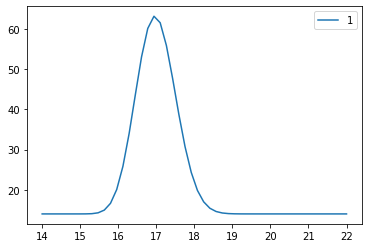

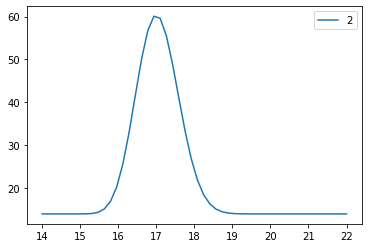

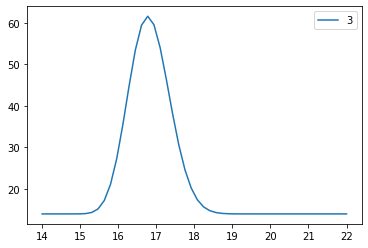

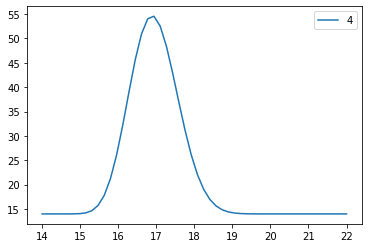

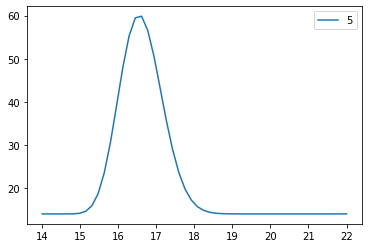

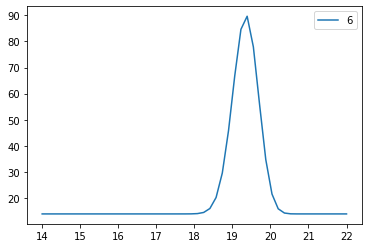

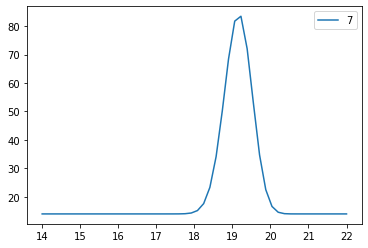

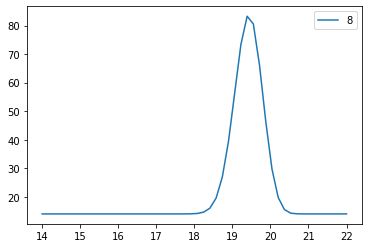

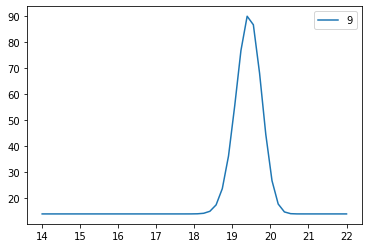

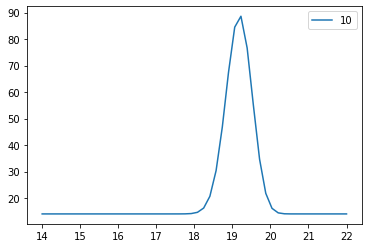

In [131]:
a=agent.alist
b=agent.blist
print(agent.alist)
print(agent.blist)
x=np.linspace(0,1,50)
x_=np.linspace(14,22,50)

for i in range(10):
    y=y = ss.beta.pdf (x, a[i], b[i])
    plt.plot(x_,(22-14)*y+14,label=f"{i+1}")
    plt.legend()
    plt.show()